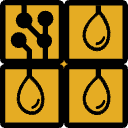

# Important Libraries for the Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Input , Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.activations import relu
from tensorflow.keras import  regularizers
from tensorflow.keras import backend as K

## Preparing the Data for the Neural Networks

In [2]:
# Load dataset
GT = pd.read_csv("C:/Users/Omid/Desktop/MDTE/Challenge 2/DT/DATASETS/gt_full.csv")

# Seperating feature and label
Target = GT[['CO','NOX']]

Feature = GT.drop(columns=['CO','NOX',],axis=1)
Feature.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
X , X_test, Y, Y_test = train_test_split(Feature,Target, test_size=0.15, random_state = 42)

Y_CO = Y['CO']
Y_NOX = Y['NOX']
Y_CO_test = Y_test['CO']
Y_NOX_test = Y_test['NOX']

Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_test_scaled = Scaler.transform(X_test)
minmax = MinMaxScaler()
X__MinMax_scaled = minmax.fit_transform(X)
X_test_MinMax = minmax.transform(X_test)
X_train_minmax , X_val_minmax , Y_train_minmax, Y_val_minmax = train_test_split(X__MinMax_scaled,Y,test_size=0.15,random_state=42 )

X_train_scaled , X_val_scaled , Y_train_scaled,Y_val_scaled = train_test_split(X_scaled,Y,test_size=0.15,random_state=42)
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


## Firts ANN

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2900.5940 - root_mean_squared_error: 49.1991 - val_loss: 380.7871 - val_root_mean_squared_error: 15.1184
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 973.0638 - root_mean_squared_error: 25.5109 - val_loss: 342.0805 - val_root_mean_squared_error: 14.4933
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 812.5436 - root_mean_squared_error: 23.2399 - val_loss: 233.7696 - val_root_mean_squared_error: 11.4483
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 717.0002 - root_mean_squared_error: 21.6500 - val_loss: 234.8384 - val_root_mean_squared_error: 11.6879
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 651.3485 - root_mean_squared_error: 20.5256 - val_loss: 232.0197 - val_root_mean_squared_error: 11.7321
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 565.3305 - root_mean_squared_error: 19.1237 - val_loss: 201.1942 - val_root_mean_squared_error: 10.7817
Epoch 7/2

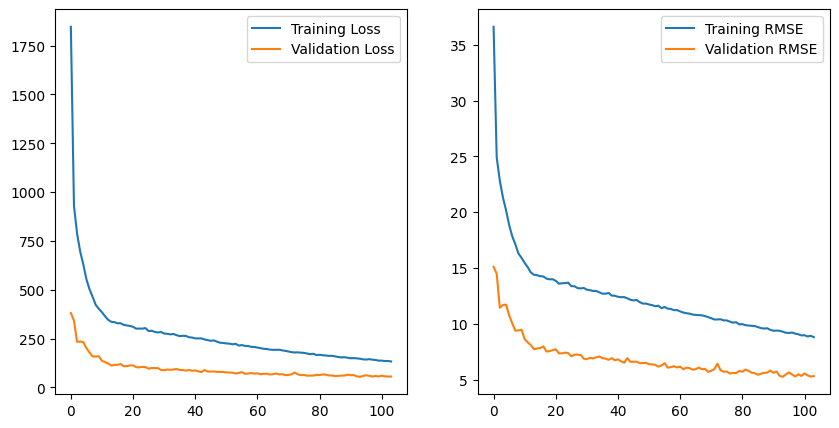

In [3]:
ANN_1 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_1 = ANN_1.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF1 = pd.DataFrame(Model_1.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF1['loss'],label='Training Loss')
plt.plot(DF1['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF1['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF1['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [4]:
ANN_1.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 50.7236 - root_mean_squared_error: 5.1975


[50.64563751220703, 5.190916538238525]

## Second Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1835.7325 - root_mean_squared_error: 35.4435 - val_loss: 164.0641 - val_root_mean_squared_error: 9.2882
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 316.7050 - root_mean_squared_error: 13.9337 - val_loss: 135.1784 - val_root_mean_squared_error: 8.7148
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 234.0360 - root_mean_squared_error: 11.9218 - val_loss: 125.7574 - val_root_mean_squared_error: 8.4359
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 219.0785 - root_mean_squared_error: 11.5313 - val_loss: 114.7212 - val_root_mean_squared_error: 8.0774
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 202.7074 - root_mean_squared_error: 11.0731 - val_loss: 110.0812 - val_root_mean_squared_error: 7.8869
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 187.9623 - root_mean_squared_error: 10.5849 - val_loss: 103.7771 - val_root_mean_squared_error: 7.6977
Epoch 7

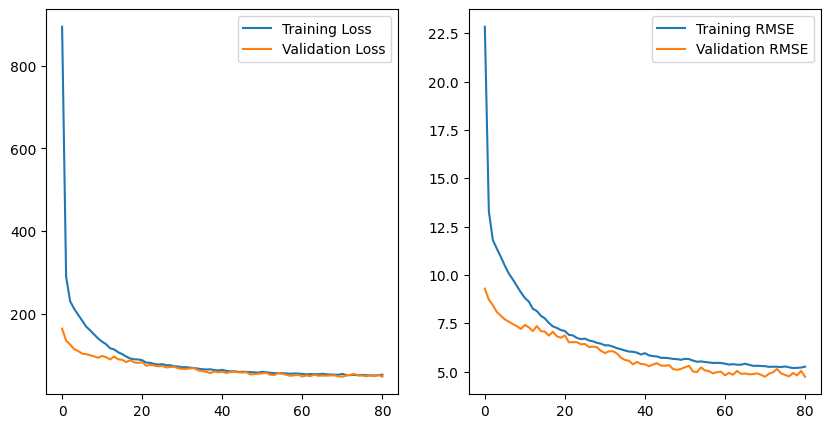

In [5]:
ANN_2 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(64,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_2 = ANN_2.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF2 = pd.DataFrame(Model_2.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF2['loss'],label='Training Loss')
plt.plot(DF2['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF2['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF2['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [6]:
ANN_2.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.3584 - root_mean_squared_error: 4.6288


[43.94232177734375, 4.611230373382568]

## third Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2303.0222 - root_mean_squared_error: 41.7302 - val_loss: 206.3432 - val_root_mean_squared_error: 10.2862
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 555.7170 - root_mean_squared_error: 18.8047 - val_loss: 174.3833 - val_root_mean_squared_error: 9.5560
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 495.5513 - root_mean_squared_error: 17.6190 - val_loss: 165.3601 - val_root_mean_squared_error: 9.3606
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 433.9089 - root_mean_squared_error: 16.5178 - val_loss: 150.7367 - val_root_mean_squared_error: 9.0181
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 383.6822 - root_mean_squared_error: 15.4487 - val_loss: 143.4490 - val_root_mean_squared_error: 8.8408
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 343.8862 - root_mean_squared_error: 14.6045 - val_loss: 146.0290 - val_root_mean_squared_error: 8.9232
Epoch 7/200
83

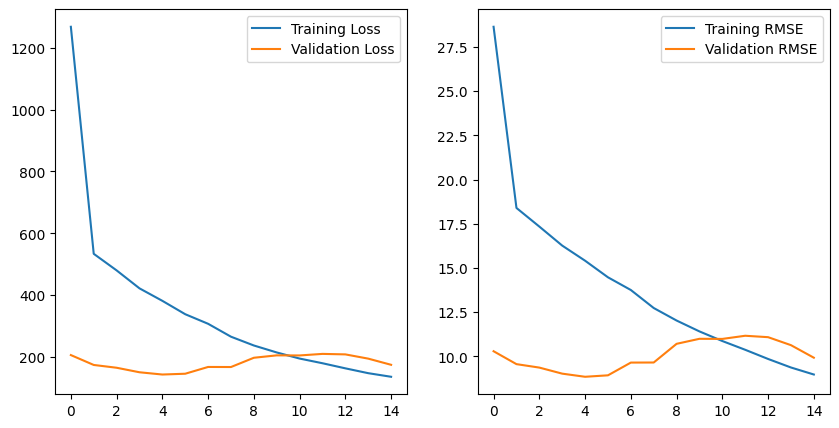

In [7]:
ANN_3 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(8,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_3 = ANN_3.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF3 = pd.DataFrame(Model_3.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF3['loss'],label='Training Loss')
plt.plot(DF3['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF3['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF3['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [8]:
ANN_3.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164.2923 - root_mean_squared_error: 9.6885


[163.24903869628906, 9.680663108825684]

## Fourth Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2489.7917 - root_mean_squared_error: 44.1348 - val_loss: 286.9535 - val_root_mean_squared_error: 12.8894
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 657.8716 - root_mean_squared_error: 20.6116 - val_loss: 196.9872 - val_root_mean_squared_error: 10.3474
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 456.3683 - root_mean_squared_error: 16.8569 - val_loss: 162.8148 - val_root_mean_squared_error: 9.3689
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 345.7457 - root_mean_squared_error: 14.5987 - val_loss: 156.0546 - val_root_mean_squared_error: 9.1317
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 313.7958 - root_mean_squared_error: 13.9096 - val_loss: 159.6725 - val_root_mean_squared_error: 9.2155
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 285.0514 - root_mean_squared_error: 13.2143 - val_loss: 180.0729 - val_root_mean_squared_error: 9.8066
Epoch 7/200
8

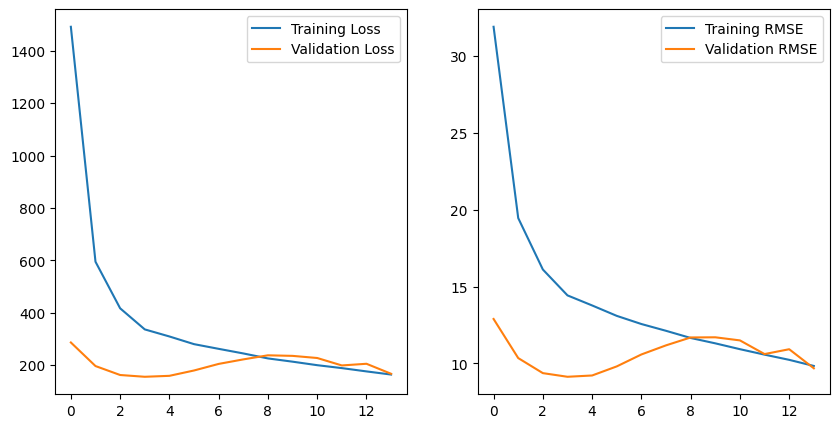

In [9]:
ANN_4 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(8,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dense(1)])
ANN_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_4 = ANN_4.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF4 = pd.DataFrame(Model_4.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF4['loss'],label='Training Loss')
plt.plot(DF4['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF4['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF4['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [10]:
ANN_4.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157.1420 - root_mean_squared_error: 9.4551


[155.99166870117188, 9.433076858520508]

## 5th Model

Epoch 1/200
415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2462.9570 - root_mean_squared_error: 43.4649 - val_loss: 243.1364 - val_root_mean_squared_error: 11.5416
Epoch 2/200
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 562.2171 - root_mean_squared_error: 18.9834 - val_loss: 259.5268 - val_root_mean_squared_error: 12.2713
Epoch 3/200
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 430.3579 - root_mean_squared_error: 16.3992 - val_loss: 287.4810 - val_root_mean_squared_error: 13.2555
Epoch 4/200
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 367.0970 - root_mean_squared_error: 15.0493 - val_loss: 309.0792 - val_root_mean_squared_error: 13.9957
Epoch 5/200
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 317.9518 - root_mean_squared_error: 13.9803 - val_loss: 345.1453 - val_root_mean_squared_error: 15.0672
Epoch 6/200
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 284.1087 - root_mean_squared_error: 13.0833 - val_loss: 395.8335 - val_root_mean_squared_error: 16.4950
Epoch 7/2

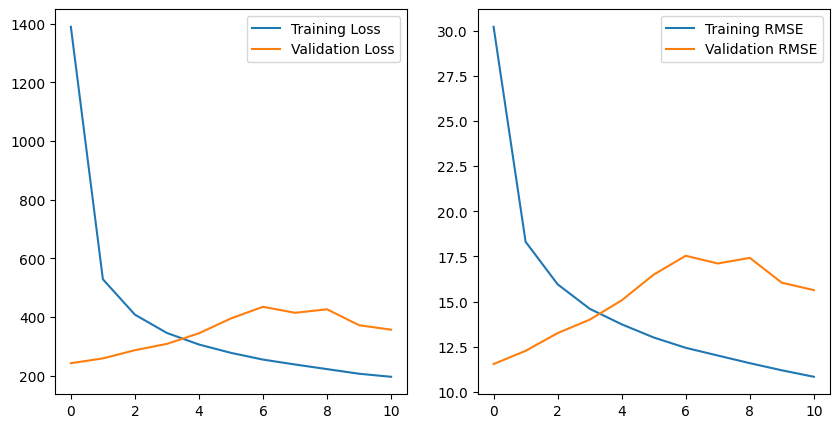

In [11]:
ANN_5 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(8,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dense(1)])
ANN_5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics=[root_mean_squared_error])
Model_5 = ANN_5.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=64,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF5 = pd.DataFrame(Model_5.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF5['loss'],label='Training Loss')
plt.plot(DF5['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF5['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF5['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [ ]:
ANN_5.evaluate(X_test_MinMax,Y_NOX_test)

## 6th Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2147.9766 - root_mean_squared_error: 39.4164 - val_loss: 179.2822 - val_root_mean_squared_error: 9.6028
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 368.0464 - root_mean_squared_error: 14.9756 - val_loss: 151.2269 - val_root_mean_squared_error: 9.0440
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 279.0648 - root_mean_squared_error: 13.0222 - val_loss: 138.0330 - val_root_mean_squared_error: 8.7710
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 242.7605 - root_mean_squared_error: 12.0921 - val_loss: 126.1469 - val_root_mean_squared_error: 8.4741
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 231.8212 - root_mean_squared_error: 11.8796 - val_loss: 117.0268 - val_root_mean_squared_error: 8.1549
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201.9743 - root_mean_squared_error: 11.0740 - val_loss: 108.8367 - val_root_mean_squared_error: 7.7953
Epoch 7/200
830

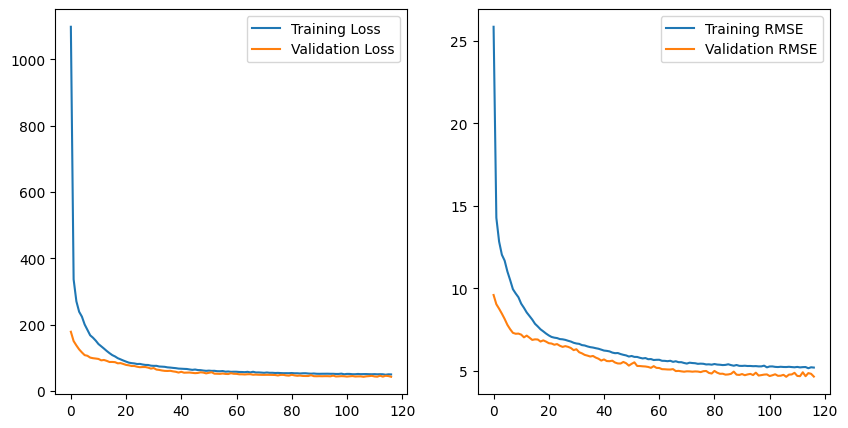

In [12]:
ANN_6 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_6 = ANN_6.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF6 = pd.DataFrame(Model_6.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF6['loss'],label='Training Loss')
plt.plot(DF6['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF6['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF6['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [13]:
ANN_6.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.2206 - root_mean_squared_error: 4.5900  


[40.93157196044922, 4.585334777832031]

## 7th Model 

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2082.2590 - root_mean_squared_error: 38.5654 - val_loss: 168.0874 - val_root_mean_squared_error: 9.3860
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 341.8325 - root_mean_squared_error: 14.5010 - val_loss: 141.6910 - val_root_mean_squared_error: 8.8487
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 264.0411 - root_mean_squared_error: 12.6937 - val_loss: 130.5911 - val_root_mean_squared_error: 8.5851
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 230.3082 - root_mean_squared_error: 11.8383 - val_loss: 126.3330 - val_root_mean_squared_error: 8.4009
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 215.2399 - root_mean_squared_error: 11.4072 - val_loss: 122.1566 - val_root_mean_squared_error: 8.2317
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 202.2893 - root_mean_squared_error: 11.0822 - val_loss: 115.1670 - val_root_mean_squared_error: 8.0433
Epoch 7/200
830

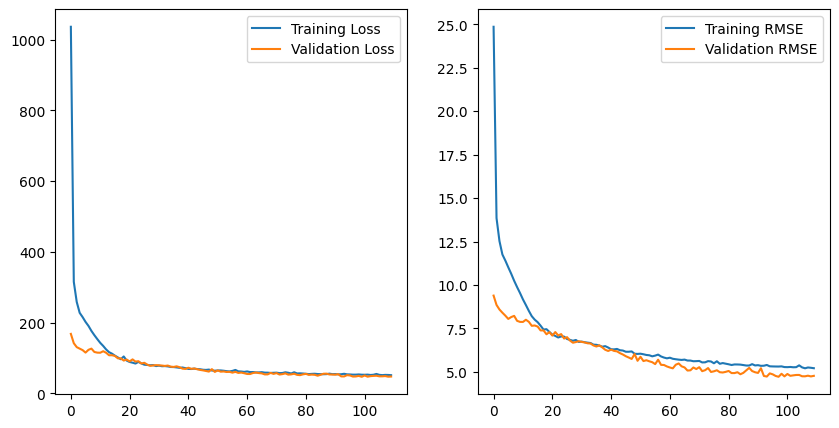

In [14]:
ANN_7 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_7 = ANN_7.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF7 = pd.DataFrame(Model_7.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF7['loss'],label='Training Loss')
plt.plot(DF7['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF7['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF7['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [15]:
ANN_7.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.9257 - root_mean_squared_error: 4.6366


[43.00416946411133, 4.635157108306885]

## 8th Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1745.9724 - root_mean_squared_error: 34.2137 - val_loss: 163.1525 - val_root_mean_squared_error: 9.2285
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 332.6373 - root_mean_squared_error: 14.2129 - val_loss: 142.3792 - val_root_mean_squared_error: 8.8257
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 253.5656 - root_mean_squared_error: 12.3116 - val_loss: 125.5903 - val_root_mean_squared_error: 8.4376
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 218.1181 - root_mean_squared_error: 11.5170 - val_loss: 115.3822 - val_root_mean_squared_error: 8.1187
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192.9251 - root_mean_squared_error: 10.8095 - val_loss: 111.3099 - val_root_mean_squared_error: 7.8515
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 174.0964 - root_mean_squared_error: 10.1540 - val_loss: 110.3547 - val_root_mean_squared_error: 7.7527
Epoch 7/200
830

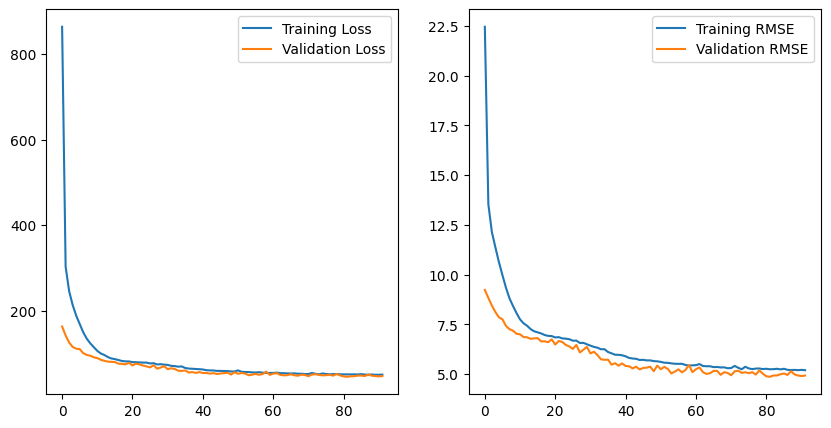

In [16]:
ANN_8 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_8.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_8 = ANN_8.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF8 = pd.DataFrame(Model_8.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF8['loss'],label='Training Loss')
plt.plot(DF8['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF8['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF8['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [19]:
ANN_8.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 43.8579 - root_mean_squared_error: 4.8321


[43.74943542480469, 4.8006134033203125]

## 9th Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1694.0582 - root_mean_squared_error: 33.2709 - val_loss: 159.5156 - val_root_mean_squared_error: 9.2077
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 303.5383 - root_mean_squared_error: 13.5621 - val_loss: 135.9846 - val_root_mean_squared_error: 8.7209
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 238.6439 - root_mean_squared_error: 12.0139 - val_loss: 128.2599 - val_root_mean_squared_error: 8.4856
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 215.9874 - root_mean_squared_error: 11.4106 - val_loss: 121.0305 - val_root_mean_squared_error: 8.2463
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 192.5896 - root_mean_squared_error: 10.8096 - val_loss: 125.3905 - val_root_mean_squared_error: 8.2657
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 172.6591 - root_mean_squared_error: 10.1527 - val_loss: 124.3931 - val_root_mean_squared_error: 8.2480
Epoch 7/200
830

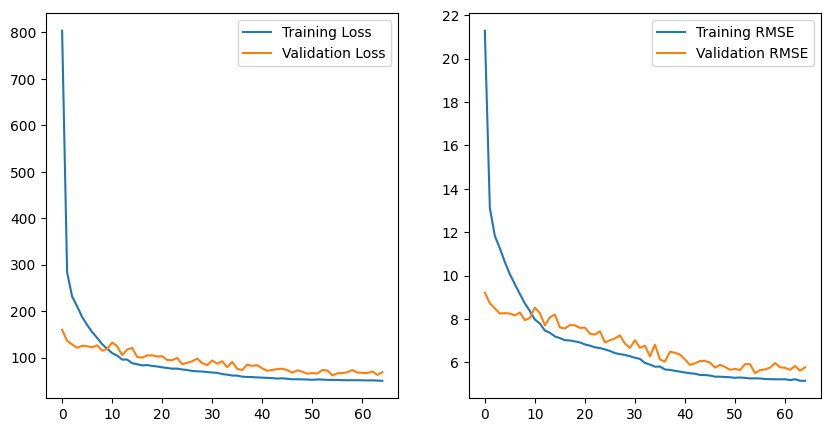

In [20]:
ANN_9 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(64,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_9.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_9 = ANN_9.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF9 = pd.DataFrame(Model_9.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF9['loss'],label='Training Loss')
plt.plot(DF9['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF9['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF9['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [23]:
ANN_9.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 61.0919 - root_mean_squared_error: 5.5811


[61.233673095703125, 5.55147123336792]

## 10th Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1895.3060 - root_mean_squared_error: 36.2655 - val_loss: 150.4347 - val_root_mean_squared_error: 9.0480
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 286.2665 - root_mean_squared_error: 13.1992 - val_loss: 140.1297 - val_root_mean_squared_error: 8.8234
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239.9866 - root_mean_squared_error: 12.0502 - val_loss: 137.3336 - val_root_mean_squared_error: 8.7089
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 221.1095 - root_mean_squared_error: 11.4818 - val_loss: 147.1453 - val_root_mean_squared_error: 8.8986
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 201.1631 - root_mean_squared_error: 10.9143 - val_loss: 143.2282 - val_root_mean_squared_error: 8.7916
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 180.9058 - root_mean_squared_error: 10.3804 - val_loss: 154.2430 - val_root_mean_squared_error: 9.0690
Epoch 7/200
830

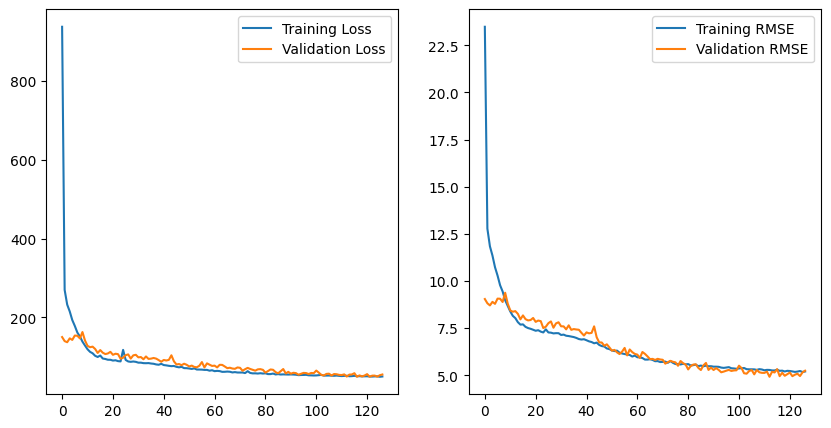

In [21]:
ANN_10 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_10.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_10 = ANN_10.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF10 = pd.DataFrame(Model_10.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF10['loss'],label='Training Loss')
plt.plot(DF10['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF10['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF10['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [22]:
ANN_10.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50.2002 - root_mean_squared_error: 5.1374


[49.76622009277344, 5.080440998077393]

## 11th Model


Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2294.4524 - root_mean_squared_error: 41.3441 - val_loss: 164.7830 - val_root_mean_squared_error: 9.2533
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 322.3319 - root_mean_squared_error: 13.9309 - val_loss: 132.5056 - val_root_mean_squared_error: 8.6756
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246.9063 - root_mean_squared_error: 12.2677 - val_loss: 125.9726 - val_root_mean_squared_error: 8.4320
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 220.1029 - root_mean_squared_error: 11.5177 - val_loss: 121.3270 - val_root_mean_squared_error: 8.2489
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 197.7340 - root_mean_squared_error: 10.8445 - val_loss: 116.8724 - val_root_mean_squared_error: 8.0750
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 180.6087 - root_mean_squared_error: 10.4585 - val_loss: 108.3356 - val_root_mean_squared_error: 7.8416
Epoch 7/200
830

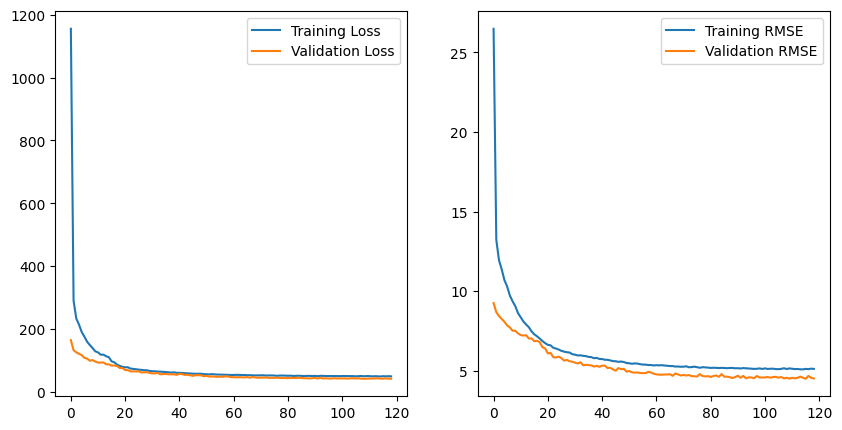

In [ ]:
ANN_11 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_11.compile(optimizer=keras.optimizers.Adam(clipnorm=1.,learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_11 = ANN_11.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF11 = pd.DataFrame(Model_11.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF11['loss'],label='Training Loss')
plt.plot(DF11['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF11['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF11['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [25]:
ANN_11.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 39.4378 - root_mean_squared_error: 4.4429


[39.21722412109375, 4.44325065612793]